# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [1]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [2]:
# TODO
casa_mas_cara = ds.loc[ds["price"].idxmax()]

direccion_mas_cara = casa_mas_cara["address"]
precio_mas_cara = casa_mas_cara["price"]

print(f"La casa con dirección en {direccion_mas_cara} es la más cara y su precio es de {precio_mas_cara} USD")


La casa con dirección en El Escorial es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [3]:
# TODO

casa_mas_barata = ds.loc[ds["price"].idxmin()]

direccion_mas_barata = casa_mas_barata["address"]
precio_mas_barata = casa_mas_barata["price"]

print(f"La casa con dirección en {direccion_mas_barata} es la más barata y su precio es de {precio_mas_barata} USD")

La casa con dirección en Parla es la más barata y su precio es de 0 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [4]:
# TODO
casa_mas_grande = ds.loc[ds["surface"].idxmax()]

direccion_mas_grande = casa_mas_grande["address"]
superf_mas_grande = casa_mas_grande["surface"]

print(f"La casa más grande esta ubicada en {direccion_mas_grande} y su supercifie es de {superf_mas_grande} metros")


casa_mas_pequeña = ds.loc[ds["surface"].idxmin()]

direccion_mas_pequeña = casa_mas_pequeña["address"]
superf_mas_pequeña = casa_mas_pequeña["surface"]

print(f"La casa más pequeña está ubicada en {direccion_mas_pequeña} y su superficie es de {superf_mas_pequeña} metros")

La casa más grande esta ubicada en Sevilla la Nueva y su supercifie es de 249000.0 metros
La casa más pequeña está ubicada en Calle Amparo,  Madrid Capital y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [5]:
# TODO

poblaciones_unicas = ds['level5'].unique()
poblaciones = ', '.join(poblaciones_unicas)

print(poblaciones)

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [6]:
# TODO
tiene_na = ds.isnull().any().any()

if tiene_na:
    filas_columnas_na = ds.isnull().stack()[ds.isnull().stack()]
    print(True)
    print(filas_columnas_na)
else:
    print(False)


True
0      level6        True
       level8        True
       zipCode       True
       customZone    True
1      surface       True
                     ... 
15333  customZone    True
15334  level4        True
       level6        True
       zipCode       True
       customZone    True
Length: 65690, dtype: bool


#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [7]:
# TODO

dimensiones_originales = ds.shape

ds_sin_na = ds.dropna()
dimensiones_sin_na = ds_sin_na.shape

print(f"Dimensiones originales: {dimensiones_originales}")
print(f"Dimensiones después de eliminar NAs: {dimensiones_sin_na}")

Dimensiones originales: (15335, 37)
Dimensiones después de eliminar NAs: (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [8]:
# TODO

arroyomolinos_df = ds[ds["level5"] == "Arroyomolinos (Madrid)"]

media_arroyomolinos = round(arroyomolinos_df["price"].mean(),2)

print(f"La media de los precios en Arroyomolinos (Madrid) es {media_arroyomolinos}.")

La media de los precios en Arroyomolinos (Madrid) es 294541.6.


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


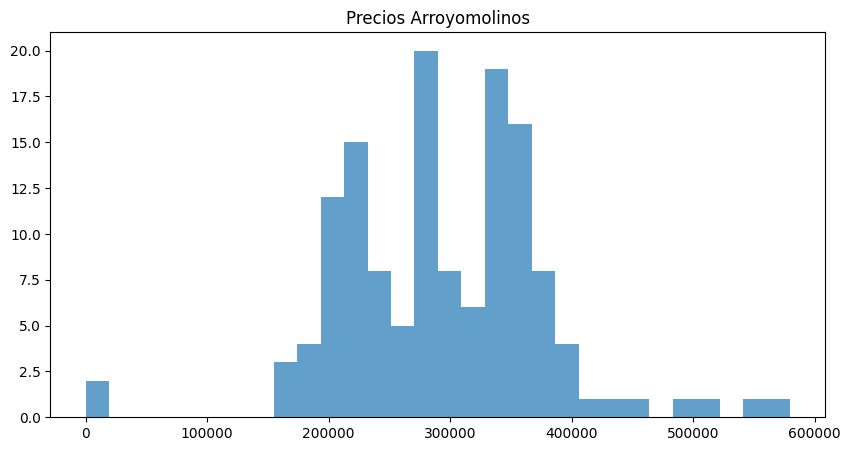

In [9]:
# TODO: Code
import matplotlib.pyplot as plt

arroyomolinos_df = ds[ds["level5"] == "Arroyomolinos (Madrid)"]
plt.figure(figsize = (10, 5))

plt.hist(arroyomolinos_df["price"], bins = 30, alpha = 0.7)

plt.title("Precios Arroyomolinos")
plt.show()

Los precios rondan de los 200000€ a los 400000€.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [10]:
# TODO
valdemorillo_df = ds[ds["level5"] == "Valdemorillo"]

media_valdemorillo = valdemorillo_df["price"].mean()

print(f"La media de los precios en Valdemorillo (Madrid) es {media_valdemorillo}.")


galapagar_df = ds[ds["level5"] == "Galapagar"]

media_galapagar = galapagar_df["price"].mean()

print(f"La media de los precios en Galapagar (Madrid) es {media_galapagar}.")

#La vivienda es más cara en Valdemorillo.

La media de los precios en Valdemorillo (Madrid) es 363860.2931034483.
La media de los precios en Galapagar (Madrid) es 360063.20238095237.


#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [11]:
# TODO
import numpy as np

ds["pps"] = ds["price"] / ds["surface"]

valdemorillo = ds[ds["level5"] == "Valdemorillo"]
galapagar = ds[ds["level5"] == "Galapagar"]

promedio_valdemorillo = valdemorillo["pps"].mean()
promedio_galapagar = galapagar["pps"].mean()

print(f"Promedio de precio por  metro cuadrado en Valdemorillo: {promedio_valdemorillo}.")
print(f"Promedio de precio por  metro cuadrado en Galapagar: {promedio_galapagar}.")

if promedio_valdemorillo == promedio_galapagar:
    print("Los promedios de precios por metro cuadrado son iguales.")
else:
    print("Los promedios de precio por metro cuadrado son diferentes.")

Promedio de precio por  metro cuadrado en Valdemorillo: 1317.9502109024986.
Promedio de precio por  metro cuadrado en Galapagar: 1606.3240303094024.
Los promedios de precio por metro cuadrado son diferentes.


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

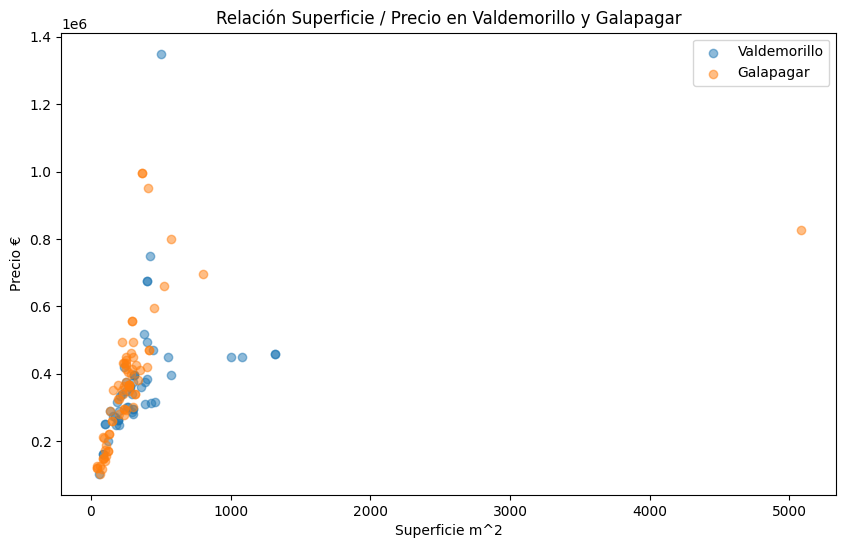

In [12]:
# TODO: Código
import matplotlib.pyplot as plt

ds_especifico = ds[ds["level5"].isin(["Valdemorillo", "Galapagar"])]

valdemorillo = ds_especifico[ds_especifico["level5"] == "Valdemorillo"]
galapagar = ds_especifico[ds_especifico["level5"] == "Galapagar"]

plt.figure(figsize = (10, 6))
plt.scatter(valdemorillo["surface"], valdemorillo["price"], alpha=0.5, label = "Valdemorillo")
plt.scatter(galapagar["surface"], galapagar["price"], alpha=0.5, label = "Galapagar")

plt.title("Relación Superficie / Precio en Valdemorillo y Galapagar")
plt.xlabel("Superficie m^2")
plt.ylabel("Precio €")

plt.legend()
plt.show()


En Valdemorillo, los precios aumentan con el incremento de superficie. Lo mismo ocurre en el caso de Galapagar.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [13]:
agencias = ds['level5'].nunique()

print(f"El número de agencias es de {agencias} agencias de bienes raíces.")

El número de agencias es de 168 agencias de bienes raíces.


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [14]:
# TODO

poblacion_casas = ds["level5"].value_counts()

poblacion_mas = poblacion_casas.idxmax()
total_casas = poblacion_casas.max()

print(f"La población con más casas es {poblacion_mas} con {total_casas}.")

La población con más casas es  Madrid Capital con 6643.


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [15]:
# TODO

sur = ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]
sur


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,1230.769231


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

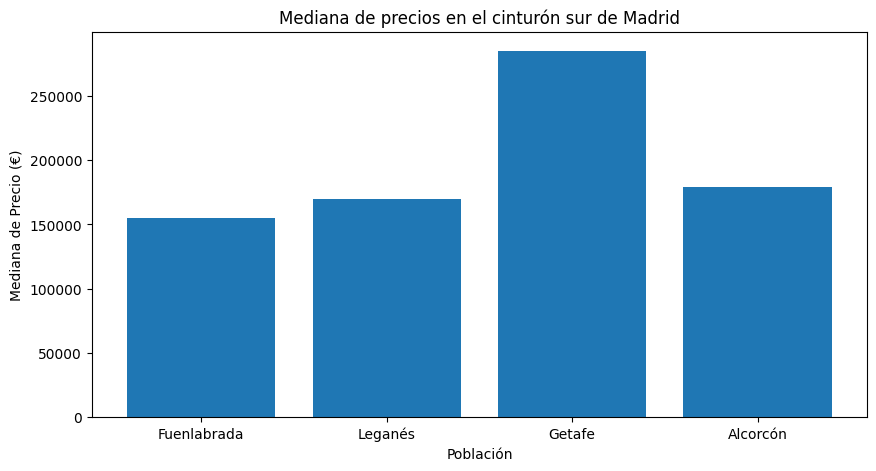

In [16]:
# TODO: Code

fuenla = np.median(sur[sur["level5"] == "Fuenlabrada"]["price"])
lega = np.median(sur[sur["level5"] == "Leganés"]["price"])
geta = np.median(sur[sur["level5"] == "Getafe"]["price"])
alcor = np.median(sur[sur["level5"] == "Alcorcón"]["price"])

labels = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
values = [fuenla, lega, geta, alcor]

plt.figure(figsize = (10, 5))

plt.bar(labels, values)
plt.xlabel("Población")
plt.ylabel("Mediana de Precio (€)")

plt.title("Mediana de precios en el cinturón sur de Madrid")
plt.show()

Se puede observar que la población más cara del cinturón sur de Madrid es Getafe, mientras que el resto de poblaciones están más a la par.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [17]:
# TODO

variables = ["price", "rooms", "surface", "bathrooms"]

for var in variables:
    media = sur[var].mean()
    varianza = sur[var].var()
    estadísticas = {"Media": media, "Varianza": varianza}

for var in variables:
    print(f"Variables: {var}")
    print(f"Media: {media}")
    print(f"Varianza: {varianza}")

Variables: price
Media: 1.633221850613155
Varianza: 0.5717968625577321
Variables: rooms
Media: 1.633221850613155
Varianza: 0.5717968625577321
Variables: surface
Media: 1.633221850613155
Varianza: 0.5717968625577321
Variables: bathrooms
Media: 1.633221850613155
Varianza: 0.5717968625577321


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [18]:
# TODO

fuenla = sur[sur["level5"] == "Fuenlabrada"]["price"].idxmax()
lega = sur[sur["level5"] == "Leganés"]["price"].idxmax()
geta = sur[sur["level5"] == "Getafe"]["price"].idxmax()
alcor = sur[sur["level5"] == "Alcorcón"]["price"].idxmax()

print("Propiedad con el precio más alto en Fuenlabrada:")
print(sur.loc[fuenla])

print("\nPropiedad con el precio más alto en Leganés:")
print(sur.loc[lega])

print("\nPropiedad con el precio más alto en Getafe:")
print(sur.loc[geta])

print("\nPropiedad con el precio más alto en Alcorcón:")
print(sur.loc[alcor])

Propiedad con el precio más alto en Fuenlabrada:
Unnamed: 0                                                      11562
id_realEstates                                              153660921
isNew                                                           False
realEstate_name                                           unna madrid
phone_realEstate                                          912780846.0
url_inmueble        https://www.fotocasa.es/es/comprar/vivienda/va...
rooms                                                             4.0
bathrooms                                                         3.0
surface                                                         274.0
price                                                          490000
date                                             2019-12-20T10:31:00Z
description         INTERHABITAT vende impresionante chalet unifam...
address                         Calle de Paulo Freire, 5, Fuenlabrada
country                                  

#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

/tmp/ipykernel_10078/2568559061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sur['precio_normalizado'] = sur.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))


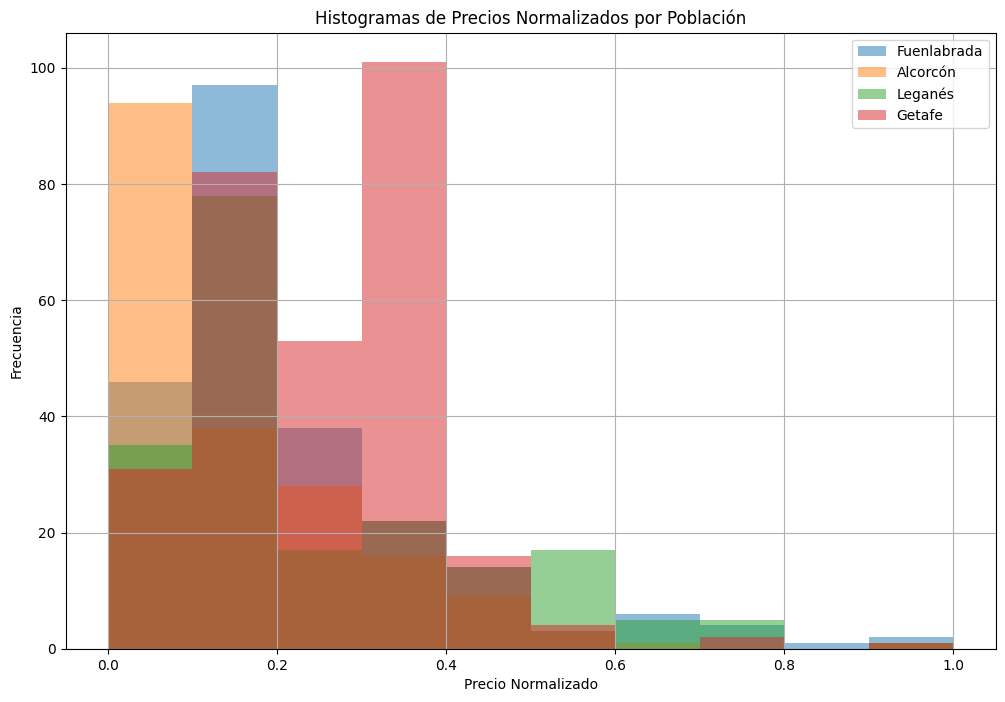

In [19]:
# TODO

sur['precio_normalizado'] = sur.groupby("level5")["price"].transform(lambda x: (x - x.min()) / (x.max() - x.min()))

plt.figure(figsize=(12, 8))

for poblacion in sur["level5"].unique():
    subset = sur[sur['level5'] == poblacion]
    plt.hist(subset["precio_normalizado"], bins=10, alpha=0.5, label=poblacion)

plt.xlabel('Precio Normalizado')
plt.ylabel('Frecuencia')
plt.title('Histogramas de Precios Normalizados por Población')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

En Fuenlabrada y Getafe, los precios están alrededor de la media. En Leganés y Alcorcón, se muestra que hay un mayor variabilidad. 

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [20]:
# TODO

sur["pps"] = sur["price"] / sur["surface"]

getafe = sur[sur["level5"] == "Getafe"]
alcorcon = sur[sur["level5"] == "Alcorcón"]

promedio_getafe = getafe["pps"].mean()
promedio_alcorcon = alcorcon["pps"].mean()

print(f"Promedio de precio por  metro cuadrado en Getafe: {promedio_getafe}.")
print(f"Promedio de precio por  metro cuadrado en Alcorcón: {promedio_alcorcon}.")

if promedio_getafe == promedio_alcorcon:
    print("Los promedios de precios por metro cuadrado son iguales.")
else:
    print("Los promedios de precio por metro cuadrado son diferentes.")

Promedio de precio por  metro cuadrado en Getafe: 2066.314949251463.
Promedio de precio por  metro cuadrado en Alcorcón: 2239.302480199618.
Los promedios de precio por metro cuadrado son diferentes.


/tmp/ipykernel_10078/1839169179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sur["pps"] = sur["price"] / sur["surface"]


#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

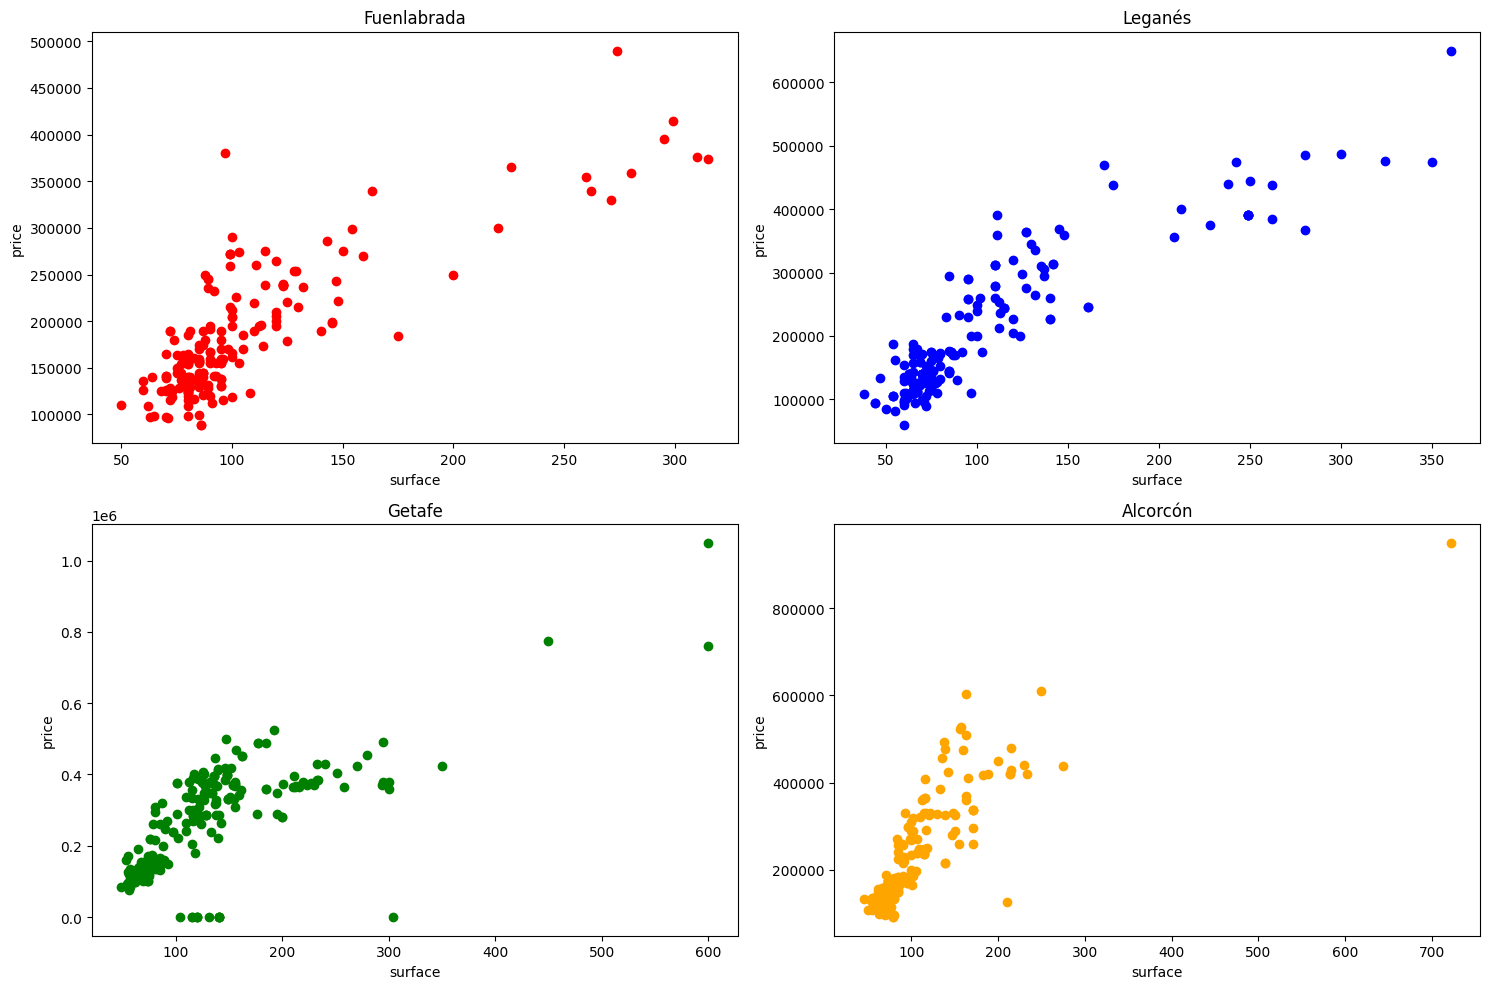

In [21]:
# TODO

sur = ds[ds["level5"].isin(["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"])]

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

poblacion_subplot = {
    "Fuenlabrada": (0, 0),
    "Leganés": (0, 1),
    "Getafe": (1, 0),
    "Alcorcón": (1, 1)
}

colores = {
    "Fuenlabrada": "red",
    "Leganés": "blue",
    "Getafe": "green",
    "Alcorcón": "orange"
}

for poblacion, (row, col) in poblacion_subplot.items():
    data_poblacion = sur[sur['level5'] == poblacion]
    axs[row, col].scatter(data_poblacion['surface'], data_poblacion['price'], color=colores[poblacion])
    axs[row, col].set_title(poblacion)
    axs[row, col].set_xlabel('surface')
    axs[row, col].set_ylabel('price')

plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [22]:
from ipyleaflet import Map, basemaps, Marker, LayerGroup, CircleMarker

# Mapa centrado en (60 grados latitud y -2.2 grados longitud)
# Latitud, longitud

map = Map(center = (40.3142, -3.4854), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemaps=basemaps.OpenStreetMap.Mapnik)

map

Map(center=[40.3142, -3.4854], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [23]:

## Aquí: traza la coordenadas de los estados

from ipyleaflet import Map, basemaps, Marker, CircleMarker

map = Map(center = (40.3142, -3.4854), zoom = 10, min_zoom = 1, max_zoom = 20, 
    basemaps=basemaps.OpenStreetMap.Mapnik)

coordenadas = {
    "Fuenlabrada": {"latitude": [], "longitude": []},
    "Leganés": {"latitude": [], "longitude": []},
    "Getafe": {"latitude": [], "longitude": []},
    "Alcorcón": {"latitude": [], "longitude": []}
}

for poblacion in coordenadas.keys():
    df_poblacion = sur[sur['address'] == poblacion]
    coordenadas[poblacion]["latitude"] = df_poblacion["latitude"].tolist()
    coordenadas[poblacion]["longitude"] = df_poblacion["longitude"].tolist()


colores = {
    "Fuenlabrada": 'red',
    "Leganés": 'blue',
    "Getafe": 'green',
    "Alcorcón": 'pink'
}

for poblacion, coords in coordenadas.items(): 
    latitudes = coords["latitude"] 
    longitudes = coords["longitude"] 
    color = colores[poblacion] 

for lat, lon in zip(latitudes, longitudes): 
    marker = CircleMarker(location=(lat, lon), color=color, fill_color=color, radius=5, fill_opacity=0.8) 
    map.add_layer(marker) 

for poblacion, coords in coordenadas.items():
    for coord in coords:
        marker = Marker(location=coord, title=poblacion)
        map.add_layer(marker)

map


Map(center=[40.3142, -3.4854], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [24]:
from ipyleaflet import Map, CircleMarker

map = Map(center=(40.3142, -3.4854), zoom=10, min_zoom=1, max_zoom=20)

coordenadas = {
    "Fuenlabrada": {"latitude": [40.2833], "longitude": [-3.7944]},
    "Leganés": {"latitude": [40.3272], "longitude": [-3.7635]},
    "Getafe": {"latitude": [40.3083], "longitude": [-3.7328]},
    "Alcorcón": {"latitude": [40.3462], "longitude": [-3.8278]}
}

colores = {
    "Fuenlabrada": 'red',
    "Leganés": 'blue',
    "Getafe": 'green',
    "Alcorcón": 'pink'
}

for poblacion, coords in coordenadas.items():
    latitudes = coords["latitude"]
    longitudes = coords["longitude"]
    color = colores[poblacion]
    
    for lat, lon in zip(latitudes, longitudes):
        
        marker = CircleMarker(location=(lat, lon), color=color, fill_color=color, 
                              radius=5, fill_opacity=0.8)
        map.add_layer(marker)

map

Map(center=[40.3142, -3.4854], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…